# Imports

In [1]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
import sklearn
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Getting Dataframe from Data

In [3]:
path = r'C:\Users\Mohit\Desktop\ML-Cricket-Integration-Project\Data\Prepared_for_ML_Data.csv'
player_balls = pd.read_csv(path)

In [4]:
player_balls.head()

,Unnamed: 0,ODI,T20,Test,Australia,England,India,New Zealand,South Africa,Sri Lanka,...,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off,Out
0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [5]:
# Removing the Unnamed: 0 column
player_balls.drop(['Unnamed: 0'], axis = 1, inplace = True)
player_balls.head()

,ODI,T20,Test,Australia,England,India,New Zealand,South Africa,Sri Lanka,USA,...,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off,Out
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


# Random Forest Classification

### Random Over-sampling (Expanding Minority)

<AxesSubplot:ylabel='Out'>

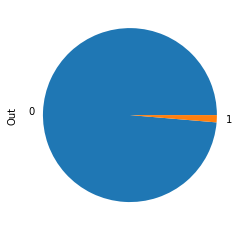

In [6]:
# Since the data is unbalanced, this can lead to a 99% accuracy even though the model has just learned to predict 0
player_balls['Out'].value_counts().plot.pie()

In [7]:
! pip install -U imbalanced-learn

<AxesSubplot:ylabel='Out'>

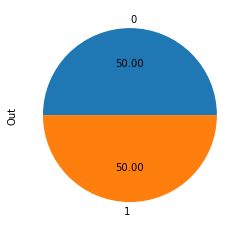

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
features, result = smote.fit_resample(player_balls.drop(['Out'], axis = 1), player_balls['Out'])

result.value_counts().plot.pie(autopct='%.2f')

In [9]:
len(result)

21442

In [10]:
# There are one hot encoded columns that aren't either 1 or 0 which is a problem
features

,ODI,T20,Test,Australia,England,India,New Zealand,South Africa,Sri Lanka,USA,...,Length: Back of a Length,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off
0,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,1.0
1,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0
2,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0
3,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.0
4,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21437,0.000000,0.0,1.000000,0.000000,0.000000,0.491871,0.000000,0.000000,0.508129,0.0,...,0.491871,0.000000,0.508129,0.0,0.0,0.0,0.000000,0.491871,0.508129,0.0
21438,1.000000,0.0,0.000000,0.000000,0.779031,0.000000,0.000000,0.220969,0.000000,0.0,...,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.0
21439,0.753906,0.0,0.246094,0.000000,0.753906,0.000000,0.246094,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.753906,0.246094,0.0
21440,0.000000,0.0,1.000000,0.230145,0.000000,0.000000,0.000000,0.769855,0.000000,0.0,...,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.769855,0.000000,0.230145,0.0


In [11]:
features.columns

Index(['ODI', 'T20', 'Test', 'Australia', 'England', 'India', 'New Zealand',
       'South Africa', 'Sri Lanka', 'USA', 'West Indies', 'left arm fast',
       'left arm legbreak', 'left arm offbreak', 'right arm fast',
       'right arm legbreak', 'right arm offbreak', 'Speed',
       'Length: Back of a Length', 'Length: Full', 'Length: Good',
       'Length: Short', 'Line: Leg Stump', 'Line: Legside',
       'Line: Middle Stump', 'Line: Off Stump', 'Line: Offside',
       'Line: Wide Outside Off'],
      dtype='object')

In [12]:
# Changing the decimal values in the database to binary values
for feature in features.columns:
    if (feature == 'Speed'):
        continue

    for i in range(0, len(features)):
        curr = features[feature].iloc[i]
        
        if (curr > 0.5):
            features[feature].iloc[i] = 1
        else:
            features[feature].iloc[i] = 0
            
    print(feature)

c:\Users\Mohit\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


ODI
T20
Test
Australia
England
India
New Zealand
South Africa
Sri Lanka
USA
West Indies
left arm fast
left arm legbreak
left arm offbreak
right arm fast
right arm legbreak
right arm offbreak
Length: Back of a Length
Length: Full
Length: Good
Length: Short
Line: Leg Stump
Line: Legside
Line: Middle Stump
Line: Off Stump
Line: Offside
Line: Wide Outside Off


In [13]:
# Now there are no decimals in place of the binary numbers
features

,ODI,T20,Test,Australia,England,India,New Zealand,South Africa,Sri Lanka,USA,...,Length: Back of a Length,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21437,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21438,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
21439,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21440,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Breaking Data into Training and Testing

In [43]:
# Splitting the data randomly between the 4 variables
# Need to drop Out column from X_train and X_test since that's what we are going to predict
# Test size is 0.2 because we want the testing data to be 20% of the original data
train_features, test_features, train_result, test_result = train_test_split(features, result, test_size = 0.20)

In [44]:
train_features.head()

,ODI,T20,Test,Australia,England,India,New Zealand,South Africa,Sri Lanka,USA,...,Length: Back of a Length,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off
16211,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12409,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4263,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13410,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13927,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
train_result.head()

16211    1
12409    1
4263     0
13410    1
13927    1
Name: Out, dtype: int64

In [46]:
print(len(train_result))
print(len(test_result))

17153
4289


### Training the Model

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(train_features, train_result)

RandomForestClassifier()

# Model Evaluation

In [48]:
rfc_predict = rfc.predict(test_features)

### Classification Report without Cross-Validation

In [49]:
print(classification_report(test_result, rfc_predict))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2145
           1       0.96      1.00      0.98      2144

    accuracy                           0.98      4289
   macro avg       0.98      0.98      0.98      4289
weighted avg       0.98      0.98      0.98      4289



### K-Fold Cross-Validation & Confusion Matrices

In [50]:
Y_train_pred = cross_val_predict(rfc, train_features, train_result, cv = 5)
train_accuracy = metrics.accuracy_score(train_result, rfc.predict(train_features))

print('Training Data Confusion Matrix: \n', confusion_matrix(train_result, Y_train_pred))
print('\nTrain Accuracy: ', train_accuracy)
print('Train Precision: ', precision_score(train_result, Y_train_pred))

Training Data Confusion Matrix: 
 [[8216  360]
 [  22 8555]]

Train Accuracy:  0.9840844167201073
Train Precision:  0.9596186203028604


In [51]:
Y_test_pred = cross_val_predict(rfc, test_features, test_result, cv = 5)
test_accuracy = metrics.accuracy_score(test_result, rfc_predict)

print('Test Data Confusion Matrix: \n', confusion_matrix(test_result, Y_test_pred))
print('\nTest Accuracy: ', test_accuracy)
print('Test Precision: ', precision_score(test_result, Y_test_pred))

Test Data Confusion Matrix: 
 [[1984  161]
 [  21 2123]]

Test Accuracy:  0.9776171601771975
Test Precision:  0.9295096322241682


# Making a Test Prediction

In [39]:
getting_ball = pd.Series.to_numpy(player_balls.iloc[5000]).reshape(1, -1)
sample_ball = getting_ball[0][0:28].reshape(1, -1)
sample_ball

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1., 77.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.]])

In [41]:
rfc.predict(sample_ball) # the prediction

c:\Users\Mohit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [42]:
rfc.predict_proba(sample_ball)

c:\Users\Mohit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[1., 0.]])